# COGS 108 - How Anime is Received in Different Audiences

# Names

- Aaron Adriano
- Ian Lomibao
- Collin Kawahara

# Overview

- Before doing data analysis, we expect there to be some significant difference to how the markets we compare respond to different genre of anime.
- After data analysis, we found that there was significant difference to how these markets rated shows that fell into the categories of these 

<a id='research_question'></a>
# Research Question

What difference, if any, is there between how the American and Japanese markets rate shows within certain genres?

Is there an association between how the amount of shows available in this genre and the magnitude of thedifference, if any, between these two markets?

<a id='background'></a>

## Background & Prior Work

As all of us watch Japanese anime to a certain extent, and analyzing this format of entertainment could yield interesting results that can reveal insight into different cultures and how they approach the medium. Now that anime has become more popular in the mainstream, we were interested in seeing if there is a trend among people around our age and whether or not there are tastes that cross cultures. For example, the series "Demon Slayer" recently had a theatrical release in 2019 that has become the highest grossing film in Japan(1) and has yet to see an international release despite the high popularity ranking on anime database MyAnimeList.(2) Despite this recent acclaim surrounding "Demon Slayer", the anime community has had a relatively underground following for a long time outside of Japan speaking from personal experience growing up as a fan. More streaming platforms have taken notice of anime's popularity in recent years and have begun licensing them, and bookstores now carry the the comic book equivalent, "manga", in their catalogue. With the increase of popularity, there is more data available than ever to make some analysis of watching habits.

We've looked around on MyAnimeList to see what the community there holds in high regards, but it is near impossible to narrow down to specific demographics through what's visible on the site itself. While there are shows listed in the top rankings that we agree deserve to be ranked there, some of these shows are relatively dated and may not reflect how our target demographic may track.

Based on our personal experience and what we've seen so far on MyAnimeList, or MAL for short, we hypothesize that shounen/action anime are universally acclaimed across the United States and Japan regions we will analyze, but that there will be differences in where shows within these genres may rank or if they appear at all in these rankings. We think this will be the case because of how some of the shows we saw on MAL were also held in high regard within the group itself, but we also are unable to account for any cultural differences or personal tastes yet.

References (include links):
- 1) https://www.economist.com/asia/2021/01/23/demon-slayer-is-the-most-successful-japanese-film-of-all-time
- 2) https://myanimelist.net/anime/38000/Kimetsu_no_Yaiba?q=demon%20slayer&cat=anime

# Hypothesis


We hypothesize that there will be significant difference between how the American and Japanese markets enjoy different genres. We believe this may be due to how the culture of these markets affects how they perceive and connect with the themes of the show.

Additionally, we hypothesize that there exists a strong, positive relationship between the abundance of a genre in the market and its difference between how markets perceive them. We believe this may be due to the large variety of media available can cater to different tastes, while more niche categories will attract users that may rate similarly.

# Dataset(s)

- Dataset Name: MyAnimeList Cleaned Dataset - Anime, Users, and User Ratings
- Link to the dataset: https://www.kaggle.com/azathoth42/myanimelist
- Number of observations: 6668 anime, 108711 users, 31284030 ratings

This dataset was scraped from MyAnimeList in 2018 and features 3 .csv files - anime_cleaned.csv, users_cleaned.csv, and animelists_cleaned.csv - which were filtered and cleaned in different ways. 

- anime_cleaned.csv
contains a list of anime that were aired up to mid-2018 and was filtered/cleaned by discarding the anime that had an unknown studio or source and anime that were not aired yet. The ratings for these anime were also removed from the animelists dataset.

- users_cleaned.csv
contains users scraped from MyAnimeList clubs and 2015-2018 MyAnimeList forums, and was filtered/cleaned by discarding users that do not have demographic information filled, users that have watched an impossible amount of episodes, and users that were too young and too old.

- animelists_cleaned.csv
contains all individual user ratings, i.e. a single row describes one user's rating for a certain anime. This dataset was filtered/cleaned by only including users from users_cleaned and anime from anime_cleaned.csv.

There is also a version of users_cleaned.csv that has ran the location data through OpenStreetMap's Nominatim service, making the location data uniform and easier to use. There is a slight margin of error with the data due to possible innaccuracies with predictions but for the size of the data, it will be negligible and will not greatly affect the results of our analysis.
- Source: https://www.kaggle.com/azathoth42/myanimelist/discussion/87070

# Setup

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib
import seaborn as sns
import scipy

from sklearn import linear_model
from scipy.stats import ttest_ind
from matplotlib import pyplot
from sklearn.metrics import r2_score

In [2]:
df_anime = pd.read_csv('anime_cleaned.csv')
df_users = pd.read_csv('users_cleaned.csv')
df_anilists = pd.read_csv('animelists_cleaned.csv')
df_users_loc = pd.read_csv('clean-locations.csv')

# Data Cleaning

Since most of the data has been cleaned by the publisher of the data, we do not need to worry about any null user information, invalid users, or invalid anime. All that's left for us to do is truncate the data as to only include the columns that are relevant to our research question.

For df_anime, we only want the columns for anime_id, title, score, scored_by, rank, and genre. We also want to only include anime that have at least 1000 ratings. We also do not want any movies or "specials", otherwise known as "Original Video Animation" (OVA) or "Original Net Animation" (ONA).

In [3]:
df_anime = df_anime[['anime_id', 'title', 'type', 'score', 'scored_by', 'rank', 'genre']]
df_anime = df_anime[(df_anime.scored_by >= 1000) & (df_anime.type == 'TV')]
df_anime.info()
df_anime.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2330 entries, 0 to 6614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   anime_id   2330 non-null   int64  
 1   title      2330 non-null   object 
 2   type       2330 non-null   object 
 3   score      2330 non-null   float64
 4   scored_by  2330 non-null   int64  
 5   rank       2330 non-null   float64
 6   genre      2330 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 145.6+ KB


,anime_id,title,type,score,scored_by,rank,genre
0,11013,Inu x Boku SS,TV,7.63,139250,1274.0,"Comedy, Supernatural, Romance, Shounen"
1,2104,Seto no Hanayome,TV,7.89,91206,727.0,"Comedy, Parody, Romance, School, Shounen"
2,5262,Shugo Chara!! Doki,TV,7.55,37129,1508.0,"Comedy, Magic, School, Shoujo"
3,721,Princess Tutu,TV,8.21,36501,307.0,"Comedy, Drama, Magic, Romance, Fantasy"
4,12365,Bakuman. 3rd Season,TV,8.67,107767,50.0,"Comedy, Drama, Romance, Shounen"


In [4]:
def clean_alt_list(list_):
    list_ = list_.replace(', ', '","')
    list_ = '["' + list_ + '"]'
    return list_

df_anime['genre'] = df_anime['genre'].apply(clean_alt_list)
df_anime['genre'] = df_anime['genre'].apply(eval)

#Create individual columns for all genres
genre_list = ['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri']

def expand_genre(row, genre):
    this_genres = row['genre']
    if genre in this_genres:
        return True
    else:
        return False

for genre in genre_list:
    df_anime[genre] = df_anime.apply(lambda row: expand_genre(row, genre), axis=1)

df_anime.drop('genre', axis=1, inplace=True)
df_anime.drop(df_anime[df_anime['Hentai'] == True].index, inplace=True)

df_anime.head()
        

,anime_id,title,type,score,scored_by,rank,Action,Adventure,Cars,Comedy,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,11013,Inu x Boku SS,TV,7.63,139250,1274.0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,2104,Seto no Hanayome,TV,7.89,91206,727.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,5262,Shugo Chara!! Doki,TV,7.55,37129,1508.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,721,Princess Tutu,TV,8.21,36501,307.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,12365,Bakuman. 3rd Season,TV,8.67,107767,50.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


The `genre` column isn't suitable for analysis as a string, so we converted it to a list, then to individual columns for the available genres on MyAnimeList. Afterwards, we drop the original `genre` column since we now have all the genres expanded.

We also drop any shows that are tagged with the 'Hentai' genre because they don't reflect the mainstream television shows we are looking to analyze.


For df_users, we only want the columns for username, user_id, birth date, and location. 

In [5]:
df_users = df_users[['username', 'user_id', 'location', 'birth_date']]

We need to truncate user location data so that we only include users from the US and Japan, then add a column that categorizes them as US or Japan. We also need to truncate age data to only include users ages 18-24. 

We slice the df with standardized location data to only include users that are in the US or Japan.

In [6]:
df_users_loc = df_users_loc[ (df_users_loc['country_code'] == 'us') | (df_users_loc['country_code'] == 'jp') ]
df_users_loc = df_users_loc[['user_id', 'country_code']]
df_users_loc['country_code'].value_counts()

us    25612
jp     1305
Name: country_code, dtype: int64

Then, we merge the users df with the df that only includes users in US or Japan and drop all users that end up having a NaN entry for their country_code, which indicates that they are not in US or Japan. Note that there are more users in the cleaned locations dataset because it was ran on the original users dataset, not the cleaned dataset that we used.

In [7]:
df_users_usjp = df_users.merge(df_users_loc, how='left', on='user_id')
df_users_usjp = df_users_usjp.dropna(subset=['country_code'])
print(df_users_usjp['country_code'].value_counts())
df_users_usjp.value_counts()

us    23801
jp     1132
Name: country_code, dtype: int64


username      user_id  location            birth_date           country_code
Pinoy_Otaku   10527    Washington, D.C.    1991-05-23 00:00:00  us              2
menyo         2384131  Osaka,Japan         1995-11-14 00:00:00  jp              2
werlwend      192396   Aurora,Colorado     1995-11-03 00:00:00  us              2
babyly        59449    miami, florida      1994-04-09 00:00:00  us              2
lollypebbles  214621   Arizona             1994-12-21 00:00:00  us              2
                                                                               ..
MakiChanTo    251449   Southwest Missouri  1997-04-10 00:00:00  us              1
Makashi805    58955    Oxnard, California  1988-06-20 00:00:00  us              1
Makar         345422   Arkansas, USA       1993-04-15 00:00:00  us              1
Makappo       3414001  Detroit, Michigan   1994-03-20 00:00:00  us              1
zzz275        96717    NY                  1988-05-26 00:00:00  us              1
Length: 24815, dtype:

There are some duplicates of users in this df, so we have to drop those duplicate entries.  We also drop the user_id and location columns since we no longer need them.

In [8]:
df_users_usjp = df_users_usjp.drop_duplicates()
df_users_usjp = df_users_usjp[['username', 'birth_date', 'country_code']]

We calculate each user's age from their birth_date entry.

In [9]:
import datetime as dt
df_users_usjp['birth_date'] = pd.to_datetime(df_users_usjp['birth_date']) 
now = pd.Timestamp('now')
df_users_usjp['age'] = (now - df_users_usjp['birth_date']).astype('<m8[Y]')

Now that we have age data, we can select all the users between ages 18 and 24 to complete user data cleaning.

In [10]:
df_users = df_users_usjp[ (df_users_usjp['age'] >= 18) & (df_users_usjp['age'] <= 24)]
series_user_counts = df_users['country_code'].value_counts()

For df_anilists, we only want the username, anime_id, my_score, and my_status columns. We then need to truncate this data to only include the users from our cleaned df_users. 

In [11]:
df_anilists = df_anilists[['username', 'anime_id', 'my_score', 'my_status']]

usernames = df_users['username'].unique()
df_anilists2 = df_anilists.loc[df_anilists['username'].isin(usernames)]
print(df_anilists.shape)
df_anilists2.shape

(31284030, 4)


(1407727, 4)

my_status indicates the following:

    1. watching
    2. completed
    3. on hold
    4. dropped
    6. plan to watch


In [12]:
df_anilists2['my_status'].value_counts()

2    774870
6    444500
1     81717
3     58128
4     48512
Name: my_status, dtype: int64

We don't need the ratings of anime that are on user's plan to watch lists, so we remove those and finish our data cleaning.

In [13]:
df_anilists3 = df_anilists2[df_anilists2['my_status'] != 6]
df_anilists = df_anilists3

In [14]:
df_anilists.info()
df_anilists.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963227 entries, 13056 to 31284022
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   username   963227 non-null  object
 1   anime_id   963227 non-null  int64 
 2   my_score   963227 non-null  int64 
 3   my_status  963227 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 36.7+ MB


,username,anime_id,my_score,my_status
13056,WhatsUpWitches,21,9,1
13057,WhatsUpWitches,269,0,3
13058,WhatsUpWitches,1735,8,2
13059,WhatsUpWitches,4224,9,2
13061,WhatsUpWitches,1,10,2


# Data Analysis & Results

First, we add the `country_code` from `df_users` to the corresponding review scores in `df_anilists` using their `username`.

We then created a new column for each country and populated it with the average user score from users in that country. We defined a function that iterates through `df_anilists` and calculates the average score for any `anime_id` found in it for each region. Afterwards, we sort by highest average score and can visualize the distribution of these regional scores.

In [15]:
def apply_country_code(row):
    this_user = row['username']
    user = df_users.loc[df_users['username'] == this_user]
    return user['country_code'].item()

df_anilists['country_code'] = df_anilists.apply(lambda row: apply_country_code(row), axis=1)
df_anilists.head()
    

<ipython-input-15-221254736fcf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anilists['country_code'] = df_anilists.apply(lambda row: apply_country_code(row), axis=1)


,username,anime_id,my_score,my_status,country_code
13056,WhatsUpWitches,21,9,1,us
13057,WhatsUpWitches,269,0,3,us
13058,WhatsUpWitches,1735,8,2,us
13059,WhatsUpWitches,4224,9,2,us
13061,WhatsUpWitches,1,10,2,us


After adding `country_code` to `df_anilists`, we can now calculate the average user score per show by country. We can then add this information to `df_anime` in new columns for both US and Japan.

We do not average any shows that had less than 10% of their region's rating it. This is to prevent outlying situations such as if a show was rated 10/10 by a single user.

We removed any shows that were not watched by both regions, since we cannot make a comparison when one group did not provide data.

In [16]:
def calculate_average_score(row, country_code):
    #Get all scores under anime_id and country_code
    anime_id = row['anime_id']
    all_scores = df_anilists.loc[(df_anilists['anime_id'] == anime_id) & (df_anilists['country_code'] == country_code)]
    mean = all_scores['my_score'].mean()
    if all_scores.shape[0] < int(series_user_counts.loc[country_code] * 0.10):
        mean = None
    return mean 
    

df_anime['us_avg'] = df_anime.apply(lambda row: calculate_average_score(row, 'us'), axis=1)
df_anime['jp_avg'] = df_anime.apply(lambda row: calculate_average_score(row, 'jp'), axis=1)

In [17]:
df_anime.dropna(inplace=True)
df_anime.reset_index(inplace=True)

In [18]:
df_anime.head()

,index,anime_id,title,type,score,scored_by,rank,Action,Adventure,Cars,...,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,us_avg,jp_avg
0,0,11013,Inu x Boku SS,TV,7.63,139250,1274.0,False,False,False,...,False,False,False,True,False,False,False,False,6.133396,6.449275
1,1,2104,Seto no Hanayome,TV,7.89,91206,727.0,False,False,False,...,False,False,False,False,False,False,False,False,5.632565,6.288889
2,7,2787,Shakugan no Shana II (Second),TV,7.72,126085,1066.0,True,False,False,...,False,False,False,True,False,False,False,False,6.266055,6.645833
3,9,853,Ouran Koukou Host Club,TV,8.34,335137,205.0,False,False,False,...,False,False,False,False,False,False,False,False,7.114272,6.926316
4,11,7054,Kaichou wa Maid-sama!,TV,8.20,315130,314.0,False,False,False,...,False,False,False,False,False,False,False,False,6.807923,6.431034


We create a DataFrame of the genres available on MyAnimeList, and count the shows that the genre has been assigned to. Using this new DataFrame, we create a horizontal barplot to view which anime genre are most abundant on MyAnimeList.

We can visually see that Comedy has the most entries on MyAnimeList, followed by Action anime. Our hypothesis is partially correct here so far, with Action ranking 2nd most produced.

For a quick description on any genres listed here you may not know, please refer to [this page provided by MyAnimeList](https://myanimelist.net/info.php?go=genre).

In [19]:
#get sums for all genre columns
genres_counted = {key: df_anime[key].sum() for key in genre_list}

df_genrecount = pd.DataFrame.from_dict(data=genres_counted, orient='index', columns=['shows'])
df_genrecount.sort_values(by=['shows'], inplace=True, ascending=False)
df_genrecount.head()

,shows
Comedy,219
Action,162
Romance,156
School,148
Supernatural,113


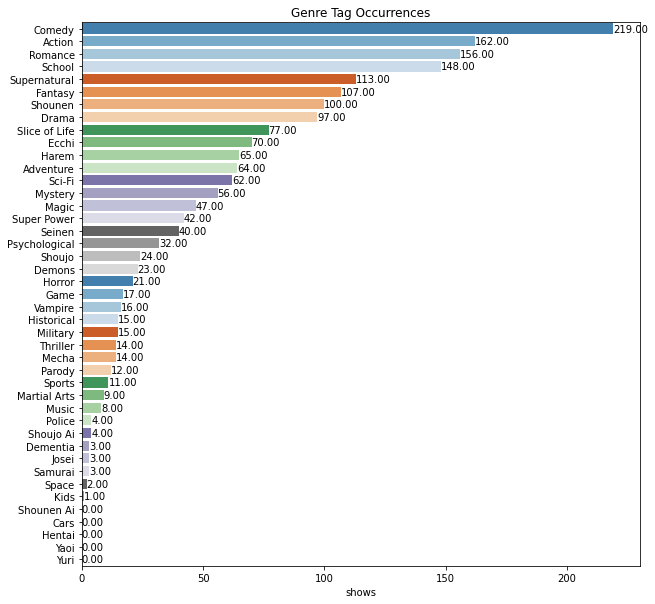

In [20]:
fig, ax = pyplot.subplots(figsize=(10,10))
g=sns.barplot(
    ax=ax,
    y=df_genrecount.index,
    x=df_genrecount.shows,
    orient='h',
    palette='tab20c'
)
g.set_title('Genre Tag Occurrences');
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment


With these two histograms, we can see that the US audience is not as critical compared to their Japanese counterparts. Both distributions appear to skew left, with Japan having a slightly more extreme skew.

We might be able to attribute this to sample sizes of our two groups. With MyAnimeList being an English-speaking site to begin with, it makes sense that there would be a smaller foreign speaking audience even if the subject of the platform originates from that country. This is seen in our data, with nearly 20 times as many users located in the United States as there are in Japan though our `value_counts` earlier in the notebook.

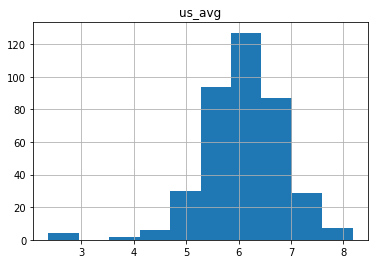

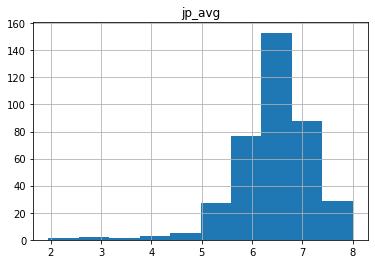

In [21]:
df_anime.hist(column='us_avg')
df_anime.hist(column='jp_avg');

## Independent Samples t-test

We can perform t-tests between the scores each region gave to shows all our genres in order to see if there is a significant difference in how the two regions rate them. In this case, we use an alpha of 0.05 in order to determine the significance of the t-test. These test results are displayed in the order of:
`t-test statistic, p-value, did the results of this test reject the null hypothesis`

For all these tests, the null hypothesis is that there is no statistically significant difference.

We will perform 3 t-tests, the first between `us_avg` and `jp_avg`, the second between `us_avg` and the global `score`, and the last being `jp_avg` and the global score.


In [28]:
from scipy.stats import t

def get_critical_value(df):
    # define probability
    p = 0.95
    # retrieve value <= probability
    value = t.ppf(p, df)
    p = t.cdf(value, df)
    return value


def test_scores(data1, data2):
    test_statistics = {}
    for genre in genre_list:
        #get list of all shows where Action is true
        df_this_genre = df_anime[df_anime[genre] == True]
        this_crit = get_critical_value(df_this_genre.shape[0])
        #perform t-test between us_avg and jp_avg
        this_t, this_p = ttest_ind(df_this_genre[data1].tolist(), df_this_genre[data2].tolist())
        this_t = abs(this_t)
        test_statistics[genre] = this_t
        print(genre,this_t, this_p, (this_p < 0.05) and (this_t > this_crit))
    
    return test_statistics

print("test between us_avg and jp_avg")
print("")

us_jp_t = test_scores('us_avg', 'jp_avg')
print("")

print("test between us_avg and global score")
print("")

us_global_t = test_scores('us_avg', 'score')
print("")

print("test between jp_avg and global score")
print("")

jp_global_t =test_scores('jp_avg', 'score')
print("")



test between us_avg and jp_avg

Action 4.602916053597107 6.002860336540679e-06 True
Adventure 2.4654013113722346 0.015031841819565388 True
Cars nan nan False
Comedy 5.136995075914884 4.2184096638042545e-07 True
Dementia 0.42543575233146913 0.6924095451327108 False
Demons 3.096588149232607 0.003401971974267783 True
Drama 2.6827120894036884 0.007939729728157461 True
Ecchi 4.527632407562357 1.2771687273976828e-05 True
Fantasy 3.2115788231281313 0.0015255023408085992 True
Game 1.983813595562783 0.05591081981030455 False
Harem 4.52082055936707 1.385940620422796e-05 True
Hentai nan nan False
Historical 1.918578153127636 0.06528569674472369 False
Horror 0.8851457264737145 0.38136821355415695 False
Josei 0.07233959013052552 0.9458043753669152 False
Kids nan nan False
Magic 1.402447504991522 0.16414707198604206 False
Martial Arts 1.624829644411685 0.12373187591065081 False
Mecha 1.0347555206584405 0.31031216743451484 False
Military 2.4896141229584874 0.018998119134790242 True
Music 0.0909958738

We can see that some of the more abundant genres like `Action` and `Comedy` have had t-tests that result in significant difference at an alpha of 0.05. Likewise, less popular have resulted in showing no significant difference between the countries' ratings of them.

We also used the absolute value of the t-statistics, mainly because they mean the same thing in a the context of a two-tailed test. Additionally, any t-tests resulting in nan just meant that there was no data available for that genre after dropping shows that were tagged with it. This may be a result of **either region not having rated a show**, or being dropped because it was **tagged under `Hentai`**.



## Linear Regression


Now, we can create a linear regression model in order to predict what number of shows a genre might have in order to produce larger differences in ratings between the American and Japanese markets. Our independent variable would be the number of shows a genre has cateogrized and our dependent variable would be the resulting t-statistic the genre produces when testing the `us_avg` and the `jp_avg`. We can also create additional linear regression models to predict the magnitude of difference in scores between either the American or Japanese market, and the global market.

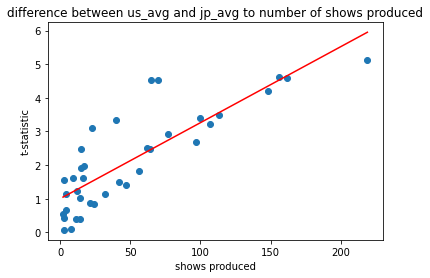

In [36]:
df_genrecount['tstat'] = df_genrecount.index.map(us_jp_t)
df_genrecount.dropna(inplace=True)

X = df_genrecount['shows'].values.reshape(-1, 1)
y = df_genrecount['tstat'].values.reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(X, y)

Y_pred = regr.predict(X)
pyplot.scatter(X, y)
pyplot.plot(X, Y_pred, color='red')
pyplot.title("difference between us_avg and jp_avg to number of shows produced")
pyplot.xlabel('shows produced')
pyplot.ylabel('t-statistic')
pyplot.show()




In [38]:
r2_score(y, Y_pred)

0.7018564694889136

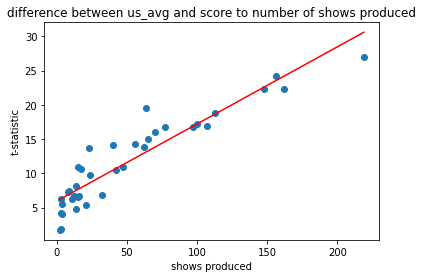

In [39]:
df_genrecount['tstat'] = df_genrecount.index.map(us_global_t)
df_genrecount.dropna(inplace=True)

X = df_genrecount['shows'].values.reshape(-1, 1)
y = df_genrecount['tstat'].values.reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(X, y)

Y_pred = regr.predict(X)
pyplot.scatter(X, y)
pyplot.plot(X, Y_pred, color='red')
pyplot.title("difference between us_avg and score to number of shows produced")
pyplot.xlabel('shows produced')
pyplot.ylabel('t-statistic')
pyplot.show()




In [40]:
r2_score(y, Y_pred)

0.8601804187181262

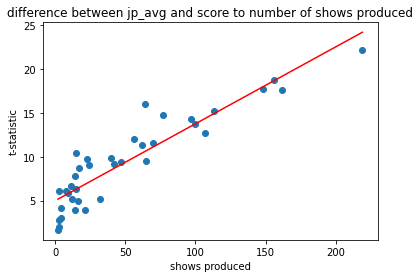

In [41]:
df_genrecount['tstat'] = df_genrecount.index.map(jp_global_t)
df_genrecount.dropna(inplace=True)

X = df_genrecount['shows'].values.reshape(-1, 1)
y = df_genrecount['tstat'].values.reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(X, y)

Y_pred = regr.predict(X)
pyplot.scatter(X, y)
pyplot.plot(X, Y_pred, color='red')
pyplot.title("difference between jp_avg and score to number of shows produced")
pyplot.xlabel('shows produced')
pyplot.ylabel('t-statistic')
pyplot.show()




In [42]:
r2_score(y, Y_pred)

0.8401483628871317

In these linear regression models, we find that there exists a positive relationship between the resulting t-statistic and the amount of shows categorized under a genre regardless. We can confirm this by getting R squared to explain how much of the observed variance in our models is explained by the input. The t-statistic used in this first model is that between United States and Japan average scores.

Our test between `us_avg` and `jp_avg` yielded an R squared of around 0.702, which would mean that 70.2% of the observed variance in our plot can be explained by this model.
Likewise, our tests between either `us_avg` or `jp_avg` and the global community's scores yielded an R squared of around 0.860 and 0.840, respectively. As such we can conclude that being from a different region creates a different taste in type of anime show.

# Ethics & Privacy

One important concern with privacy is that the though the user data is completely public and accessible to anyone on the MyAnimeList site, there is no expressed consent, but only a terms of service and privacy policy that they agree to when signing up for the website and entering demographic information. However, there is also anonyminity in the data set, as the users are just based on usernames, with an option to publically give their demographics. In regards to bias in the data we are using, we cannot see any implicit biases that would affect the results of our analysis because of the large sample size.

Since our data analysis intends to explore the popular anime trends from a large population of anime watchers, it could motivate publishers and studios to make more of the most popular genre of anime, which could oversaturate the market. However, we do not think that it is likely that our analysis could cause a significant shift in the market as we are analyzing what is already popular, rather than predicting the next big trend. Also, just because a certain genre is the more popular than others doesn't mean that all shows within that genre will be as successful or popular because there are many, less tangible factors that affect a show's success, such as the quality of a show's animation, story, etc. 

# Conclusion & Discussion

To reiterate our research question:

What difference, if any, is there between how the American and Japanese markets rate shows within certain genres, and is there an association between how the amount of shows available in this genre and the magnitude of the difference, if any, between these two markets?

Our analysis has shown that there is a statistically significant difference between how the American and Japanese markets rate genres with *an abundant amount of shows* categorized. This was seen with how the most abundant genres, like `Comedy` and `Action` had the two largest t-statistics and were the two most abundant genre of anime available to be found on MyAnimeList. These results support our hypothesis that there would be a significant difference between the markets and that a linear relationship would exist in regards to these differences and number of shows.

Our dataset was, in some ways, needlessly large to begin with. However, it was also valuable and useful in providing the data necessary to complete this project. A lot of columns were removed within the notebook for the purposes of the project, leaving a lot of data on the cutting room floor. There was a lot of wrangling needed to be done as well in order to get our data in a usable manner. This included calculating new columns and combining dataframes together in order to make our visualizations, perform our tests, and create our model. One specific bottleneck in this project was having to determine which ratings came from what region via user data in one file and the actual rating itself in another file. Processing this notebook took a long time at this step because the multiple dataframes had to be indexed in order to assign location data properly for analysis.

This project is a product of the fundamental techniques learned throughout the quarter in COGS108. Primarily, data cleaning, EDA, analysis and hypothesis testing. Thankfully, we did not have to collect the data for this project ourselves. If the need to collect more data did arise, however, the publishers of our dataset provided the web scraping tools necessary to do so. We also applied some statistical tests not found in this class, but were possible with Python in order to carry out our analysis. The use of independent t-tests was needed to answer our question. Combining this with a linear regression model helped to add futher depth to our analysis, predicting that there is something about being from a different country that changes one's opinion on a type of show. We also found that with more shows of a certain type available, these genres' ratings would have larger magnitudes of difference. One possible explanation for this could be that with a larger variety of shows, there exists more opportunity for the individual to scrutinize different aspects of an individual show in comparison to its peers.

This project focused on anime, a form of entertainment that has seen a rise in popularity worldwide. Despite the cultural and geographical differences in its audience, we can find that there are some things that everyone can enjoy.

# Team Contributions

- Aaron Adriano - Project planning, data wrangling, statistical analysis
- Ian Lomibao - Project planning, data cleaning and wrangling
- Collin Kawahara - Project planning, statistical analysis